<a href="https://colab.research.google.com/github/anshu109/unsupervised_learning/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import required Libraries**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

**Read csv file**

In [7]:
data = pd.read_csv('/content/employee-compensation.csv')
data.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


**rows and columns in data**

In [8]:
data.shape

(120303, 22)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120303 entries, 0 to 120302
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  120303 non-null  int64  
 1   Job Family Code          120303 non-null  object 
 2   Job Code                 120303 non-null  object 
 3   Year Type                120303 non-null  object 
 4   Year                     120303 non-null  int64  
 5   Organization Group       120303 non-null  object 
 6   Department Code          120303 non-null  object 
 7   Department               120303 non-null  object 
 8   Union Code               120303 non-null  int64  
 9   Union                    120303 non-null  object 
 10  Job Family               120303 non-null  object 
 11  Job                      120303 non-null  object 
 12  Employee Identifier      120303 non-null  int64  
 13  Salaries                 120303 non-null  float64
 14  Over

In [10]:
data.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                    object
Year Type                   object
Year                         int64
Organization Group          object
Department Code             object
Department                  object
Union Code                   int64
Union                       object
Job Family                  object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Organization Group Code,120303.0,2.873478,1.500265,1.00,2.000,2.000,4.000,7.00
Year,120303.0,2013.992286,0.809706,2013.00,2013.000,2014.000,2015.000,2015.00
Union Code,120303.0,490.422051,332.522988,1.00,250.000,535.000,790.000,990.00
Employee Identifier,120303.0,28567.281847,16479.297958,1.00,14268.000,28564.000,42917.000,56986.00
Salaries,120303.0,63574.766805,44288.775287,-2596.00,24335.470,62577.010,93459.825,339653.70
Overtime,120303.0,4517.180541,11203.512445,-1072.88,0.000,0.000,2961.705,208668.82
Other Salaries,120303.0,3906.869561,7863.155643,-7058.59,0.000,793.990,4851.760,342802.63
Total Salary,120303.0,71998.816906,52036.368639,-2596.00,26496.805,68111.840,103626.595,471952.64
Retirement,120303.0,13225.522029,9823.855914,-30621.43,4034.080,13407.530,19870.295,73203.06
Health and Dental,120303.0,8992.883826,4871.712257,-502.11,4519.020,11993.530,12918.240,21291.18


**Finding any null values in data**

In [12]:
data.isnull().sum()

Organization Group Code    0
Job Family Code            0
Job Code                   0
Year Type                  0
Year                       0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family                 0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health and Dental          0
Other Benefits             0
Total Benefits             0
Total Compensation         1
dtype: int64

**Eliminating the null values**

In [13]:
df = data.dropna()
df.isna().sum()

Organization Group Code    0
Job Family Code            0
Job Code                   0
Year Type                  0
Year                       0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family                 0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health and Dental          0
Other Benefits             0
Total Benefits             0
Total Compensation         0
dtype: int64

Total salary is the sum of salries and other salaries so we can drop these two columns

In [14]:
df.drop('Other Salaries', axis='columns',inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
df.drop('Salaries',axis='columns',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


organisation group and organisation group code is same so we can delete one of them

In [16]:
df.drop('Organization Group',axis='columns',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
df.drop('Year Type',axis='columns',inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
df.head()

,Organization Group Code,Job Family Code,Job Code,Year,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Overtime,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,2013,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,0.0,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,2013,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,0.0,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,2013,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,0.0,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,2013,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,0.0,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,2013,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,0.0,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [19]:
df.tail()

,Organization Group Code,Job Family Code,Job Code,Year,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Overtime,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
120297,5,9900,9910,2015,REC,REC Recreation & Park Commsn,790,"SEIU - Miscellaneous, Local 1021",Public Service Aide,Public Service Trainee,532,0.0,1745.39,0.0,848.21,135.42,983.63,2729.02
120298,5,9900,9910,2015,REC,REC Recreation & Park Commsn,790,"SEIU - Miscellaneous, Local 1021",Public Service Aide,Public Service Trainee,53454,0.0,2633.63,0.0,1282.29,204.23,1486.52,4120.15
120299,5,9900,9910,2015,REC,REC Recreation & Park Commsn,790,"SEIU - Miscellaneous, Local 1021",Public Service Aide,Public Service Trainee,53458,0.0,1373.23,0.0,666.03,106.58,772.61,2145.84
120300,5,9900,9910,2015,REC,REC Recreation & Park Commsn,790,"SEIU - Miscellaneous, Local 1021",Public Service Aide,Public Service Trainee,53464,0.0,127.40,0.0,59.73,9.89,69.62,197.02
120301,5,9900,9910,2015,REC,REC Recreation & Park Commsn,790,"SEIU - Miscellaneous, Local 1021",Public Service Aide,Public Service Trainee,53558,0.0,7297.20,0.0,2903.03,564.98,3468.01,10765.21


In [20]:
df['Total Benefits']=df['Other Benefits']+df['Health and Dental']+df['Retirement']
df['Total Benefits']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         27747.13
1         22216.82
2         30116.78
3         40021.45
4          2428.31
            ...   
120297      983.63
120298     1486.52
120299      772.61
120300       69.62
120301     3468.01
Name: Total Benefits, Length: 120302, dtype: float64

In [21]:
df.drop('Total Benefits',axis='columns',inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Organization Group Code,Job Family Code,Job Code,Year,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Overtime,Total Salary,Retirement,Health and Dental,Other Benefits,Total Compensation
0,1,1000,1021,2013,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,0.0,57534.65,11253.16,11961.34,4532.63,85281.78
1,1,1000,1023,2013,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,0.0,57678.50,10284.88,7176.80,4755.14,79895.32
2,1,1000,1031,2013,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,0.0,63532.93,12495.83,12918.24,4702.71,93649.71
3,1,1000,1054,2013,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,0.0,94215.92,19644.45,12918.24,7458.76,134237.37
4,1,1000,1062,2013,ADP,ADP Adult Probation,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,0.0,5084.00,1083.90,956.91,387.50,7512.31


**Checking inique values in each columns**

In [22]:
cols=df.columns
for i in cols:
  print(i, 'has :', df[i].nunique(), 'Unique Values')

Organization Group Code has : 7 Unique Values
Job Family Code has : 56 Unique Values
Job Code has : 1105 Unique Values
Year has : 3 Unique Values
Department Code has : 54 Unique Values
Department has : 54 Unique Values
Union Code has : 69 Unique Values
Union has : 72 Unique Values
Job Family has : 55 Unique Values
Job has : 1112 Unique Values
Employee Identifier has : 46881 Unique Values
Overtime has : 48615 Unique Values
Total Salary has : 112218 Unique Values
Retirement has : 86395 Unique Values
Health and Dental has : 39556 Unique Values
Other Benefits has : 109743 Unique Values
Total Compensation has : 118221 Unique Values


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


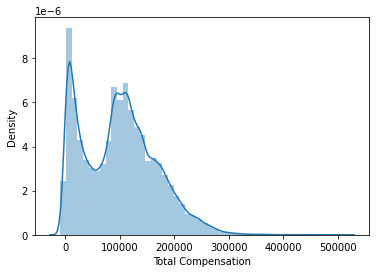

In [23]:
sns.distplot(df['Total Compensation'])
plt.show()

In [24]:

print("Skewness: %f" % df['Total Compensation'].skew())
print("Kurtosis: %f" % df['Total Compensation'].kurt())


Skewness: 0.409321
Kurtosis: -0.250681


In [25]:
df1=df.select_dtypes(include=('int64','float64'))
df1.head()

,Organization Group Code,Year,Union Code,Employee Identifier,Overtime,Total Salary,Retirement,Health and Dental,Other Benefits,Total Compensation
0,1,2013,21,37730,0.0,57534.65,11253.16,11961.34,4532.63,85281.78
1,1,2013,21,26574,0.0,57678.50,10284.88,7176.80,4755.14,79895.32
2,1,2013,21,8148,0.0,63532.93,12495.83,12918.24,4702.71,93649.71
3,1,2013,21,27436,0.0,94215.92,19644.45,12918.24,7458.76,134237.37
4,1,2013,21,37730,0.0,5084.00,1083.90,956.91,387.50,7512.31


In [26]:
corr_df=df1.corr()
corr_df

,Organization Group Code,Year,Union Code,Employee Identifier,Overtime,Total Salary,Retirement,Health and Dental,Other Benefits,Total Compensation
Organization Group Code,1.000000,-0.089016,0.005683,-0.004564,-0.299784,-0.300198,-0.265415,-0.241567,0.011459,-0.286916
Year,-0.089016,1.000000,0.002177,0.000354,0.019081,-0.004623,0.018701,-0.031357,0.010475,-0.002531
Union Code,0.005683,0.002177,1.000000,-0.001314,0.056550,0.013453,-0.052165,-0.065919,-0.277734,-0.017239
Employee Identifier,-0.004564,0.000354,-0.001314,1.000000,0.000762,0.000261,-0.000499,-0.001953,0.000369,0.000008
Overtime,-0.299784,0.019081,0.056550,0.000762,1.000000,0.498810,0.316500,0.313769,0.066045,0.456965
Total Salary,-0.300198,-0.004623,0.013453,0.000261,0.498810,1.000000,0.933415,0.753927,0.597039,0.994167
Retirement,-0.265415,0.018701,-0.052165,-0.000499,0.316500,0.933415,1.000000,0.798692,0.659329,0.959172
Health and Dental,-0.241567,-0.031357,-0.065919,-0.001953,0.313769,0.753927,0.798692,1.000000,0.586858,0.802022
Other Benefits,0.011459,0.010475,-0.277734,0.000369,0.066045,0.597039,0.659329,0.586858,1.000000,0.653642
Total Compensation,-0.286916,-0.002531,-0.017239,0.000008,0.456965,0.994167,0.959172,0.802022,0.653642,1.000000


# Determine value of K for clusters using elbow method

In [27]:
df1.columns

Index(['Organization Group Code', 'Year', 'Union Code', 'Employee Identifier',
       'Overtime', 'Total Salary', 'Retirement', 'Health and Dental',
       'Other Benefits', 'Total Compensation'],
      dtype='object')

In [28]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist

In [29]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
X= df1.drop(['Organization Group Code', 'Year', 'Union Code', 'Employee Identifier',
       'Overtime', 'Retirement', 'Health and Dental',
       'Other Benefits'],axis=1)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [30]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 69258.2952186207
2 : 42000.85386560159
3 : 25849.46183864569
4 : 20543.01662351909
5 : 16773.591696219035
6 : 14262.47679799575
7 : 12491.10582942345
8 : 11202.612812915535
9 : 10376.234227503028


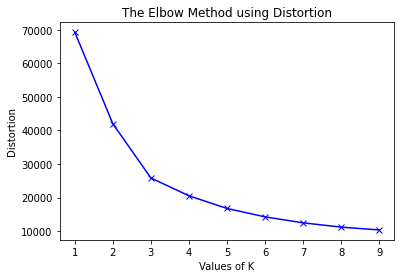

In [31]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

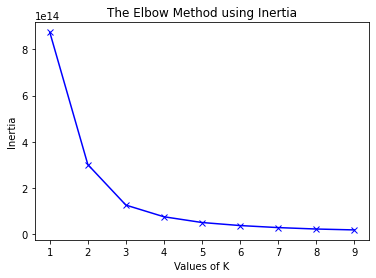

In [35]:

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

# Find clusters using k =3

In [36]:

kmeans=KMeans(n_clusters=3)

In [48]:
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [49]:
print(kmeans.cluster_centers_)


[[3.32738828e+00 2.01400037e+03 5.15619845e+02 2.85867166e+04
  3.92836494e+02 1.69551532e+04 2.48790360e+03 3.13102757e+03
  1.40058696e+03 2.39746713e+04]
 [2.18579001e+00 2.01399680e+03 5.32854548e+02 2.85594588e+04
  1.30961406e+04 1.48877031e+05 2.62852095e+04 1.27305568e+04
  7.31406247e+03 1.95206860e+05]
 [2.85898242e+00 2.01398405e+03 4.51348751e+02 2.85568285e+04
  3.54232728e+03 7.68456326e+04 1.50906589e+04 1.16212386e+04
  5.77439562e+03 1.09331926e+05]]


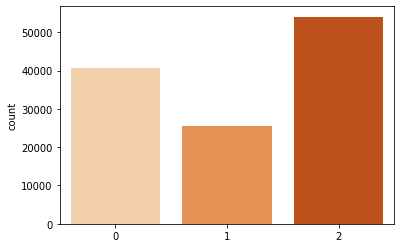

In [50]:
sns.countplot(x=kmeans.labels_, palette='Oranges')
plt.show()

In [51]:
df1.head()

,Organization Group Code,Year,Union Code,Employee Identifier,Overtime,Total Salary,Retirement,Health and Dental,Other Benefits,Total Compensation
0,1,2013,21,37730,0.0,57534.65,11253.16,11961.34,4532.63,85281.78
1,1,2013,21,26574,0.0,57678.50,10284.88,7176.80,4755.14,79895.32
2,1,2013,21,8148,0.0,63532.93,12495.83,12918.24,4702.71,93649.71
3,1,2013,21,27436,0.0,94215.92,19644.45,12918.24,7458.76,134237.37
4,1,2013,21,37730,0.0,5084.00,1083.90,956.91,387.50,7512.31


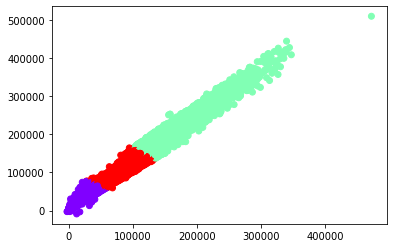

In [68]:
plt.scatter(df1.iloc[:,5].values,df.iloc[:,-1].values, c=kmeans.labels_, cmap="rainbow")

plt.show()

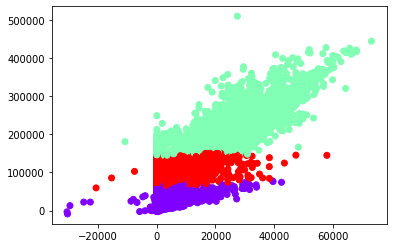

In [70]:
plt.scatter(df1.iloc[:,6].values,df.iloc[:,-1].values, c=kmeans.labels_, cmap="rainbow")

plt.show()